In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A vous de jouer

H0 : La saison de voyage est indépendante de la destination.

H1 : La saison de voyage dépend de la destination.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
data = pd.read_csv("/content/Données clients VertiGo_nettoyées.csv")

In [ ]:
data.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget_voyage_annuel,durée moyenne de voyage annuelle (en jours)
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407,4.0
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226,20.0
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144,5.0
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307,19.0
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348,10.0


In [ ]:
contingency_table = pd.crosstab(data["destination"], data["saison de voyage"])
print(contingency_table)

saison de voyage  automne  hiver  printemps  été
destination                                     
Australie               9     23          7   18
Bali                   19     23         11   36
Brésil                  7     17         12   24
Costa Rica             14     22         10   26
France                  8     32          8   32
Islande                14     15          3   18
Japon                  10     17         10   22
Maroc                  10     10          8   17
Norvège                14     25         20   18
Népal                  15     30         12   26
Pérou                  12     23         12   20
Vietnam                10     21          7   21


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Bali'),
  Text(1, 0, 'Népal'),
  Text(2, 0, 'Norvège'),
  Text(3, 0, 'Japon'),
  Text(4, 0, 'Islande'),
  Text(5, 0, 'Costa Rica'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Maroc'),
  Text(8, 0, 'Brésil'),
  Text(9, 0, 'Australie'),
  Text(10, 0, 'Pérou'),
  Text(11, 0, 'Vietnam')])

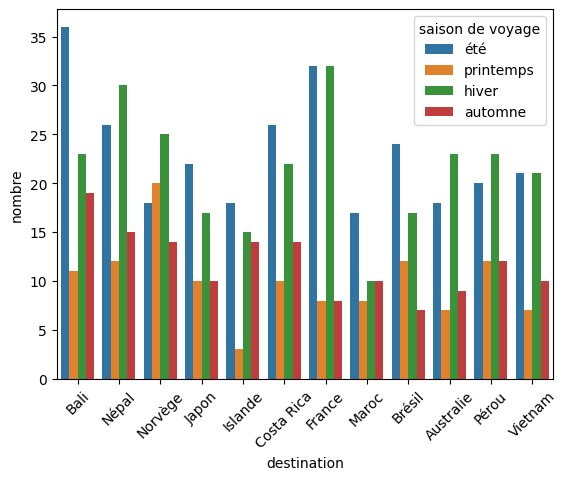

In [ ]:
data["nombre"] = 1
sns.barplot(
    data=data,
    x="destination", y="nombre", hue="saison de voyage", estimator="sum")
plt.xticks(rotation=45)

<Axes: xlabel='saison de voyage', ylabel='destination'>

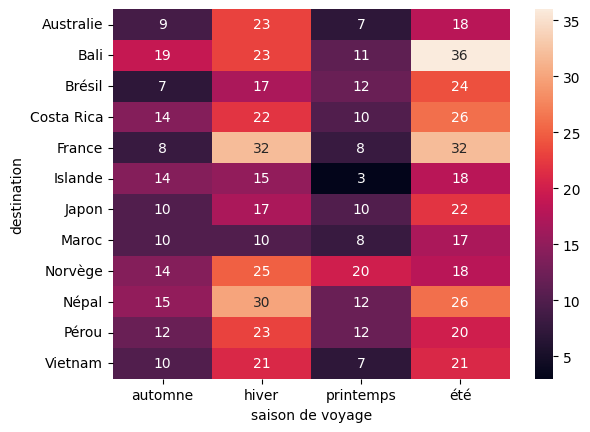

In [ ]:
sns.heatmap(contingency_table, annot=True)

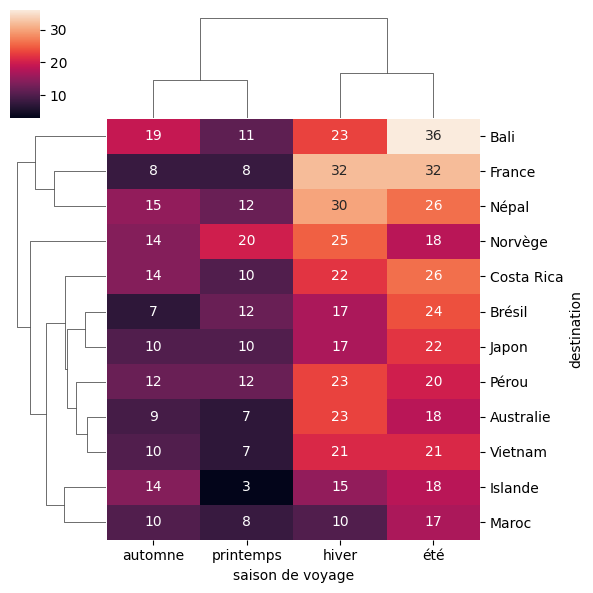

In [ ]:
sns.clustermap(contingency_table, annot=True, figsize=(6,6))

In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique Chi-2: 33.94482802594955
Valeur p: 0.42183824392169467
Degrés de liberté: 33
Fréquences attendues:
[[10.14285714 18.42857143  8.57142857 19.85714286]
 [15.83709273 28.77443609 13.38345865 31.00501253]
 [10.67669173 19.39849624  9.02255639 20.90225564]
 [12.81203008 23.27819549 10.82706767 25.08270677]
 [14.23558897 25.86466165 12.03007519 27.86967419]
 [ 8.89724311 16.16541353  7.51879699 17.41854637]
 [10.49874687 19.07518797  8.87218045 20.55388471]
 [ 8.0075188  14.54887218  6.76691729 15.67669173]
 [13.70175439 24.89473684 11.57894737 26.8245614 ]
 [14.76942356 26.83458647 12.48120301 28.91478697]
 [11.92230576 21.66165414 10.07518797 23.34085213]
 [10.49874687 19.07518797  8.87218045 20.55388471]]


On ne peut pas rejetté H0. On en conclut que la saison de voyage est indépendante de la destination.